In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import urllib
import sklearn.utils
from sklearn.datasets import load_breast_cancer
# import machine learning module
from sklearn.decomposition import PCA
# create a heatmap
import seaborn as sns

# create bar chart
import matplotlib.pyplot as plt

- Import data into Python environment. - <div class="selector"><font color="blue">done</font></div>
- Provide the trend chart for the number of complaints at monthly and daily granularity levels. <div class="selector"><font color="blue">done</font></div>
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [4]:
com = pd.read_csv('/Users/one/Desktop/Simplylearn/Python/dataset/Comcast_telecom_complaints_data.csv')
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
# convert date column to date_format
com['Date'] = pd.to_datetime(com['Date'], format = '%d-%m-%y')
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [6]:
# add a month column
from datetime import date
com['Date_month_year'] = com['Date'].dt.month_name()
com 

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,April,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-08-04,August,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,April,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,July,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,May,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,February,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,February,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,2015-09-06,September,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,June,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


<AxesSubplot:xlabel='Date'>

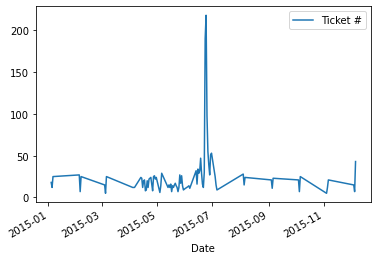

In [7]:
# daily 
daily = com.groupby('Date')['Ticket #'].count()
# removing indexes
daily_df = pd.DataFrame(daily).reset_index()
daily_df

# plot dataframe
daily_df.plot(x = 'Date', y = 'Ticket #', kind = 'line')

<AxesSubplot:xlabel='Date_month_year'>

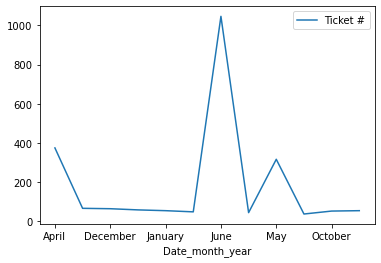

In [8]:
# monthly ....

# grouping 
monthly = com.groupby('Date_month_year')['Ticket #'].count()

## removing indexes
monthly_df = pd.DataFrame(monthly).reset_index()
monthly_df

## plot the dataframe
monthly_df.plot(x = 'Date_month_year', y = 'Ticket #', kind = 'line')

In [10]:
# provide a table with the frequency of complaint types
df_temp1 = com.groupby(['Customer Complaint'])['Ticket #'].count()
print(df_temp1)

# check for keywords in complaints
com['Customer Complaint'].str.contains('speed', case = False)

# read the .csv for different categories

Customer Complaint
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!                                                                         1
10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls    1
2 months and Comcast has not fixed problem                                                                                                   1
2+ Day Degraded Services                                                                                                                     1
300 GB monthly allowance                                                                                                                     1
                                                                                                                                            ..
why am I paying for this ?                                                                                                 

0        True
1       False
2        True
3       False
4       False
        ...  
2219    False
2220    False
2221    False
2222    False
2223     True
Name: Customer Complaint, Length: 2224, dtype: bool

In [15]:
# saving topics and frequency in a list of lists
data = [['speed', com['Customer Complaint'].str.contains('speed', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()], 
        ['network', com['Customer Complaint'].str.contains('network', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()], 
        ['internet', com['Customer Complaint'].str.contains('internet', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()], 
        ['service', com['Customer Complaint'].str.contains('service', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()], 
        ['bill', com['Customer Complaint'].str.contains('bill', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()], 
        ['customer service', com['Customer Complaint'].str.contains('customer service', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()], 
        ['tv', com['Customer Complaint'].str.contains('tv', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()], 
        ['cap', com['Customer Complaint'].str.contains('cap', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()], 
        ['price', com['Customer Complaint'].str.contains('price', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()],
       ['policies', com['Customer Complaint'].str.contains('policies', case = False).sum()/com['Customer Complaint'].str.contains('speed', case = False).count()]]

# initializing the dataframe
df = pd.DataFrame(data, columns = ['Complaint Type', 'Frequency'])

df.sort_values(by=['Frequency'], inplace=True, ascending=False)
df

,Complaint Type,Frequency
2,internet,0.239209
3,service,0.219874
4,bill,0.170414
0,speed,0.086331
7,cap,0.085432
5,customer service,0.035072
8,price,0.026529
6,tv,0.010791
9,policies,0.001799
1,network,0.000899


In [16]:
# Which complaint types are maximum i.e., 
# around internet, network issues, or across any other domains.

# ---> Internet and service


# total
output = str(round(df['Frequency'].sum(),4)*100) +"%"
output

'87.63%'

In [17]:
# categorical variable with STATUS == OPEN / CLOSED
com['status_1'] = ['Open' if Status == 'Open' or Status == 'Pending' else 'Closed' for Status in com['Status']]
com['status_1']


0       Closed
1       Closed
2       Closed
3         Open
4       Closed
         ...  
2219    Closed
2220    Closed
2221    Closed
2222    Closed
2223      Open
Name: status_1, Length: 2224, dtype: object

In [26]:
#  no of complaints by state
#      "statewise complaints"
com.groupby('State')['Ticket #'].count().sort_values(ascending = False)
# Which state has the maximum complaints 
 ## Georgia
# Which state has the highest percentage of unresolved complaints

## aggregate by state and status1

com.groupby(['State','status_1'])['Ticket #'].count()
############################################### unstack().percentage())(())

### Alabama has most resolved and unresolved complaints
df1=com.groupby(['State','status_1'])['Ticket #'].count().unstack().fillna(0)
df1 = pd.DataFrame(df1)
df1

status_1,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

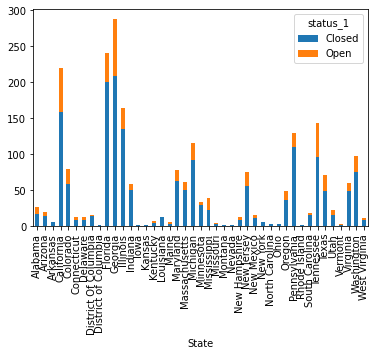

In [27]:
# plot data in stack manner of bar type
df1[['Closed','Open']].plot(kind='bar', stacked=True)

In [24]:
# Provide the percentage of complaints resolved till date, which 
# were received through the Internet and customer care calls.
com.groupby(['Received Via','status_1'])['Ticket #'].count()

# % complaints resolved till date via Internet
# a = 843 / (843+262)  
#a ## 76% 

#  % complaints resolved till date via Internet
#b = 864 / (864+255)  
#b ## 77% 

0.7721179624664879